<a href="https://colab.research.google.com/github/SHUBHAM-55555/CORONA_VIRUS_TWEET_SENTIMENT_ANALYSIS_CLASSIFICATION_EDA_PROJECT/blob/main/Corona_Virus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - CoronaVirus Tweet Sentiment Analysis



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member  -**  - Shubham Suresh Mandhare

# **Project Summary -**

**This is a prpject of covid data and as everyone has gone through is period and everyone from us had faced this pandemic while it was going on so i thought to get the tweet information about this data that's why i choose this project for classification from supervised learning.**

**while performing this project i searched a lot in google, kaggle and github community and i got the idea about this project more so i could perform this individually  and then i started this project from scratch and i completed this project of classification by doing some analysis this  topic, like what kind of tweets were their, were they positive or negative and classified then into various categories to get the final results from the data set.**

# **GitHub Link -**

https://github.com/SHUBHAM-55555/CORONA_VIRUS_TWEET_SENTIMENT_ANALYSIS_CLASSIFICATION_EDA_PROJECT

# **Problem Statement**


**This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.**
**The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:**

Location

Tweet At

Original Tweet

Label

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')


# Importing libraries for text preprocessing and NLP
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Dataset Loading

In [3]:
# Load Dataset

In [4]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing the dataset in CSV format from google drive using the encoding of ISO-8859-1
tweet_df = pd.read_csv('/content/Coronavirus Tweets.csv', encoding="ISO-8859-1")

### Dataset First View

In [6]:
# Dataset First Look

In [7]:
tweet_df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [8]:
tweet_df.tail()

UserName  ScreenName                      Location     TweetAt  \
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
41152  Airline pilots offering to stock supermarket s...             Neutral  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative

### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count

In [10]:
tweet_df.shape

(41157, 6)

### Dataset Information

In [11]:
# Dataset Info

In [12]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count

In [14]:
tweet_df.duplicated().sum()

0

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count

In [16]:
tweet_df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [17]:
# Looking for unique values in each columns/Attributes of dataset
for i in tweet_df.columns:
  print("Total Unique Values in", i, "-", len(tweet_df[i].unique()))

Total Unique Values in UserName - 41157
Total Unique Values in ScreenName - 41157
Total Unique Values in Location - 12221
Total Unique Values in TweetAt - 30
Total Unique Values in OriginalTweet - 41157
Total Unique Values in Sentiment - 5


### What did you know about your dataset?

The dataset is about the tweet from the covid period and carrying 41157 rows and 6 columns and not havinf any duplicate value which is good in terms of data processing and for the result purpose so we dont need to delete any rows and some of the columnns having missing values in it which we need to filter and convert in the best possible manner.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns

In [19]:
tweet_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [20]:
# Dataset Describe

In [21]:
tweet_df.describe()

UserName    ScreenName
count  41157.000000  41157.000000
mean   24377.000000  69329.000000
std    11881.146851  11881.146851
min     3799.000000  48751.000000
25%    14088.000000  59040.000000
50%    24377.000000  69329.000000
75%    34666.000000  79618.000000
max    44955.000000  89907.000000

### Variables Description

**userName**-- Coded username

**ScreenName**-- Coded Screen Name

**Location**-- Region of Origin

**TweetAt**-- Tweet Timing

**OriginalTweet**--First time in the thread

**Sentiment_Target_variable**--Sentiment of the tweet

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.

In [23]:
# Looking for unique values in each columns/Attributes of dataset
for i in tweet_df.columns:
  print("Total Unique Values in", i, "-", len(tweet_df[i].unique()))

Total Unique Values in UserName - 41157
Total Unique Values in ScreenName - 41157
Total Unique Values in Location - 12221
Total Unique Values in TweetAt - 30
Total Unique Values in OriginalTweet - 41157
Total Unique Values in Sentiment - 5


## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Write your code to make your dataset analysis ready.

In [25]:
# Checking  missing values in 'Location' column
miss_value = tweet_df['Location'].isnull().sum()/(tweet_df.shape[0]) * 100
print("We have {:.2f} % of missing values in 'Location' Column".format(miss_value))

We have 20.87 % of missing values in 'Location' Column


### What all manipulations have you done and insights you found?

The data not contating any duplicate values so we dont need to delete any rows because of that but in column location their are some missing values in that we have to treat after visualization and the overall percentage of this missing value is 20.87%.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [26]:
# Chart - 1 visualization code

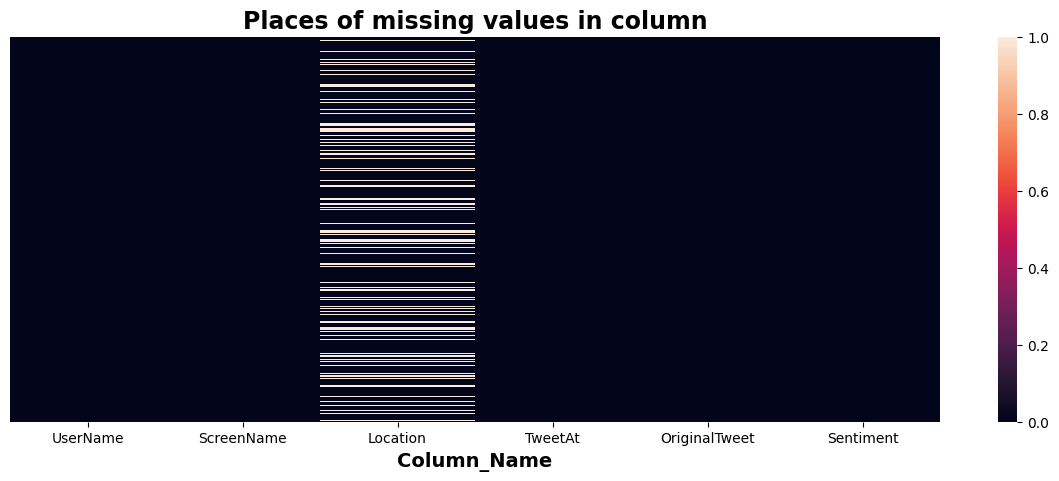

In [27]:
# Plot No- 1
# Plotting heatmap of different columns to check the missing values
plt.figure(figsize=(15, 5))
sns.heatmap(tweet_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

##### 1. Why did you pick the specific chart?

tp see the missing value through the heat map

##### 2. What is/are the insight(s) found from the chart?

from the above heat map we can easily find out most of the missing values places throughout the rows like on which most of the missing values are present

#### Chart - 2

In [28]:
# Chart - 2 visualization code

In [29]:
# Looking into the count value of different Location
tweet_df.Location.value_counts().head(15)

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Name: Location, dtype: int64

In [30]:
# Looking for the unique values in the variable
tweet_df.Location.unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

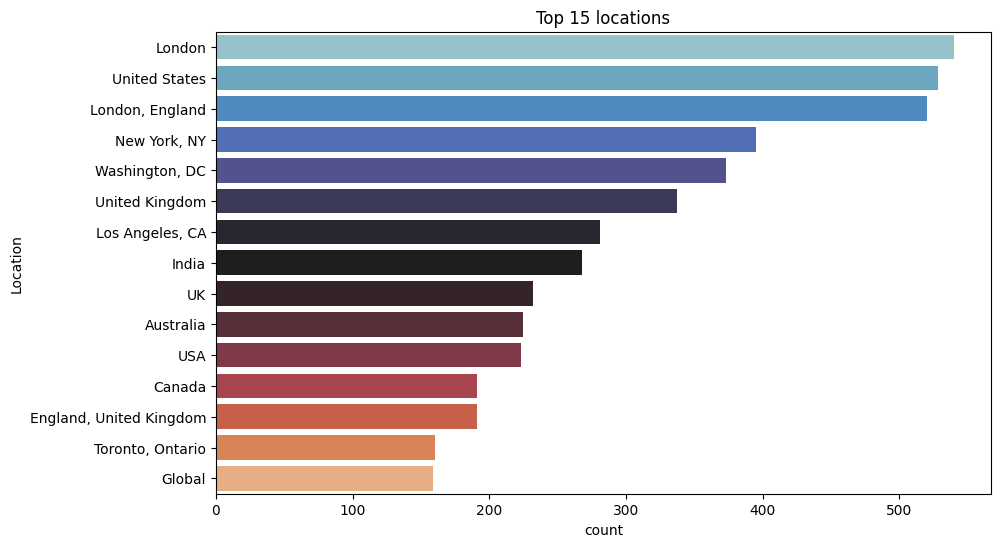

In [31]:
# Plot No- 2
# Looking for top 15 Countries in Countplot
plt.figure(figsize=(10,6))
sns.countplot(y=tweet_df.Location, order = tweet_df.Location.value_counts().iloc[:15].index, palette ='icefire')
plt.title('Top 15 locations')
plt.show()

##### 1. Why did you pick the specific chart?

using count plot to know the top 15 countries

##### 2. What is/are the insight(s) found from the chart?

The above count plot shows the top 15 locations in the dataset.

Plot shows the London to be the maximum among all the different locations.

Second place is of United States and India ranks at 8th place.

#### Chart - 3

In [32]:
# Chart - 3 visualization code

In [33]:
# Importing required library
import plotly.graph_objects as go

In [34]:
# Creating dataframe for location
location = pd.DataFrame(tweet_df['Location'].value_counts().sort_values(ascending=False))
location = location.rename(columns={'Location':'count'})

In [35]:
# Plot No- 3
# Plotting the interactive pie plot in percentage of Top 15 locations
data = {
   "values": location['count'][:15],
   "labels": location.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Percentage of Location</b>", legend=dict(x=0.1, y=1.0, orientation="v"))
data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

##### 1. Why did you pick the specific chart?

The above pie plot shows the percentage wise Top 15 locations in the present dataset.

##### 2. What is/are the insight(s) found from the chart?

Here we can again see London has the maximum percentage share of 11.7%, followed by United States with 11.4% and again London, England with 11.2%.
India which is placed at 8th place shares the percentage of 5.8%.

#### Chart - 4

In [36]:
# Chart - 4 visualization code

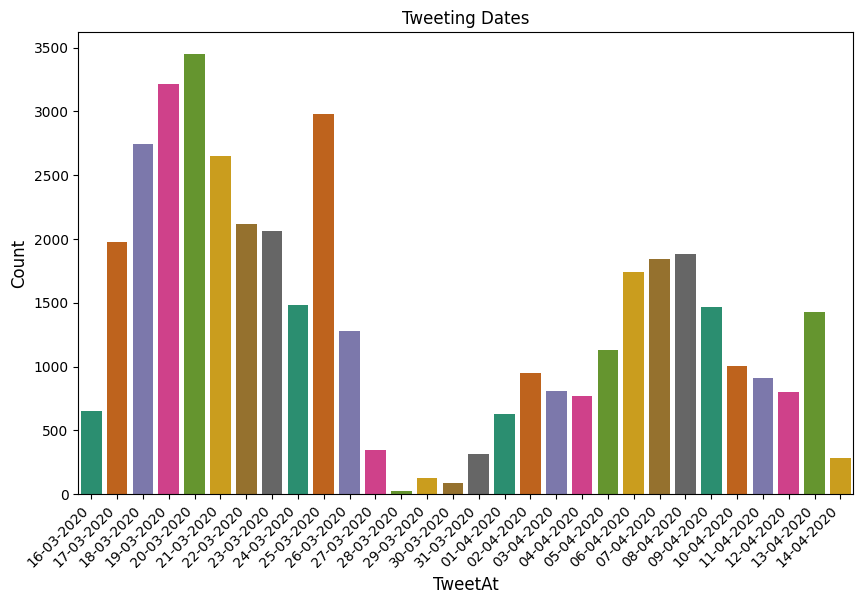

In [37]:
# Plot No- 4
# Distribution of Dates of Tweets
plt.figure(figsize=(10,6))
sns.countplot(x='TweetAt', data=tweet_df, palette ='Dark2')
plt.xticks(rotation=45, ha='right')
plt.title("Tweeting Dates")
plt.ylabel("Count", fontsize = 12)
plt.xlabel("TweetAt",fontsize = 12)
plt.show()


##### 1. Why did you pick the specific chart?

The above count plot shows the overall distribution of different tweeting dates in the dataset. Starting from the mid-month of March 2020 to mid-month of April 2020.

##### 2. What is/are the insight(s) found from the chart?

From the we can find out that the date 20-03-2020 has the maximum count value among all the other occuring dates.

Least count value is for date 28-03-2020.

The tweeting date ranges from 16-03-2020 to 14-04-2020, which is approx 30 days in total.

#### Chart - 5

In [38]:
# Chart - 5 visualization code

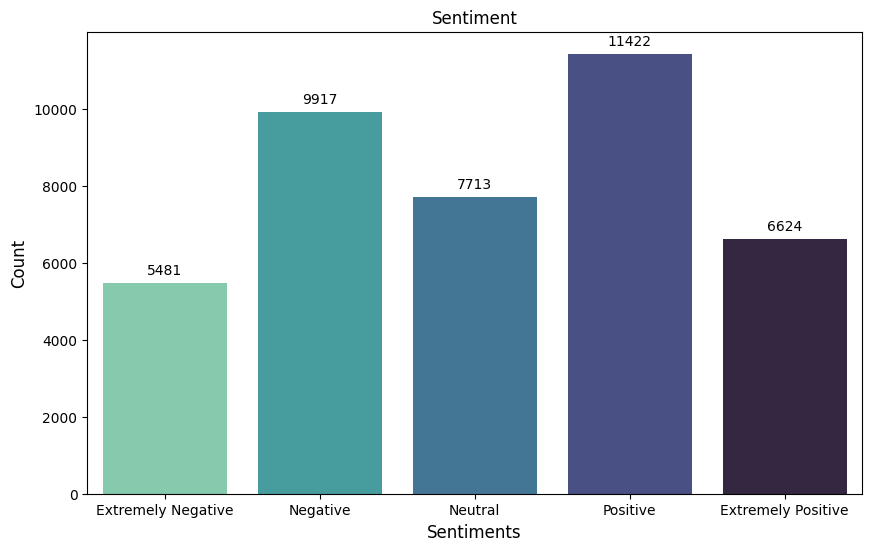

In [39]:
# Plot No- 5
# Plotting the Sentiments count value as countplot
plt.figure(figsize=(10,6))
splot = sns.countplot(x='Sentiment', data=tweet_df, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'], palette="mako_r")
# adding annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0,9), textcoords = 'offset points')
plt.title("Sentiment")
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Sentiments",fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

The above plot is showing the count value of different sentiments present in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The most common occuring sentiment is positive, followed by negative, neutral, extremely positive and least is extremely negative.

#### Chart - 6

In [40]:
# Chart - 6 visualization code

In [41]:
# Copying the dataframe
tt_df = tweet_df.copy()
# tt_df['OriginalTweet'] = tt_df['text']

In [42]:
# Creating the new column 'Text'
tt_df['text'] = tt_df.OriginalTweet
tt_df["text"] = tt_df["text"].astype(str)

In [43]:
# Calculating the text count
class_df = tt_df.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
class_df.style.background_gradient(cmap='viridis')

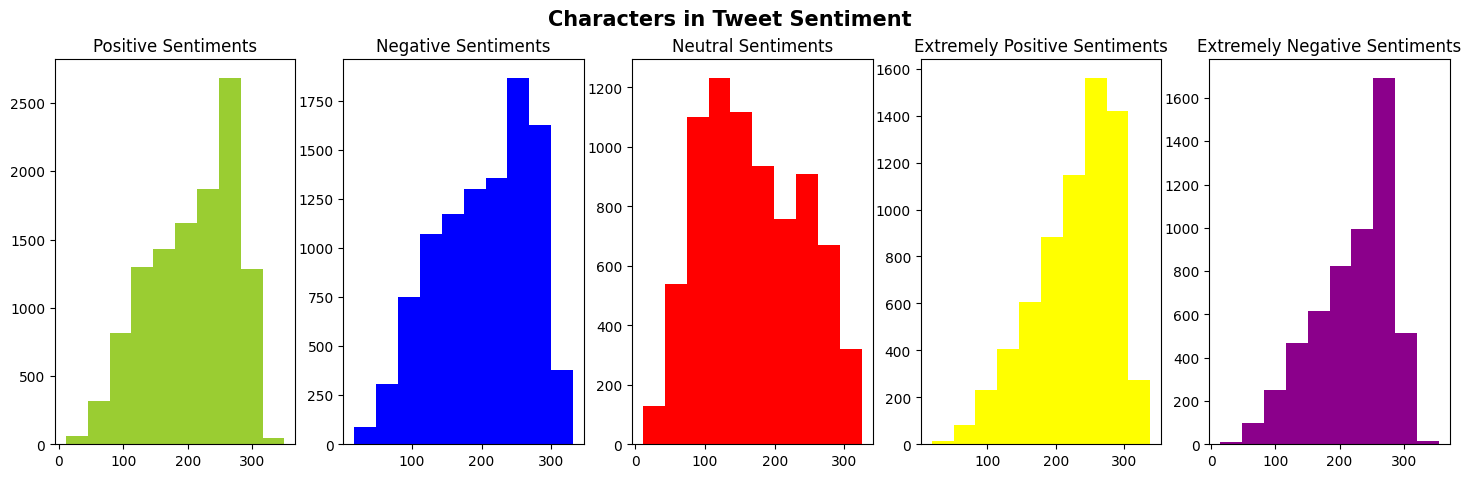

In [44]:
# Plot No - 6
# Plotting the number of characters for each tweet sentiment types
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(18,5))
tweet_len=tt_df[tt_df['Sentiment']=="Positive"]['text'].str.len()
ax1.hist(tweet_len,color='yellowgreen')
ax1.set_title('Positive Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Negative"]['text'].str.len()
ax2.hist(tweet_len,color='blue')
ax2.set_title('Negative Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Neutral"]['text'].str.len()
ax3.hist(tweet_len,color='red')
ax3.set_title('Neutral Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Extremely Positive"]['text'].str.len()
ax4.hist(tweet_len,color='yellow')
ax4.set_title('Extremely Positive Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Extremely Negative"]['text'].str.len()
ax5.hist(tweet_len,color='darkmagenta')
ax5.set_title('Extremely Negative Sentiments')


fig.suptitle("Characters in Tweet Sentiment", size=15,fontweight="bold")
# Showing the plot
plt.show()

##### 1. Why did you pick the specific chart?

To Check the sentiment characters

##### 2. What is/are the insight(s) found from the chart?

So from the Above visualization we can see that the distribution of characters in tweet about the positive or negative sentiments

#### Chart - 7

In [45]:
# Chart - 7 visualization code

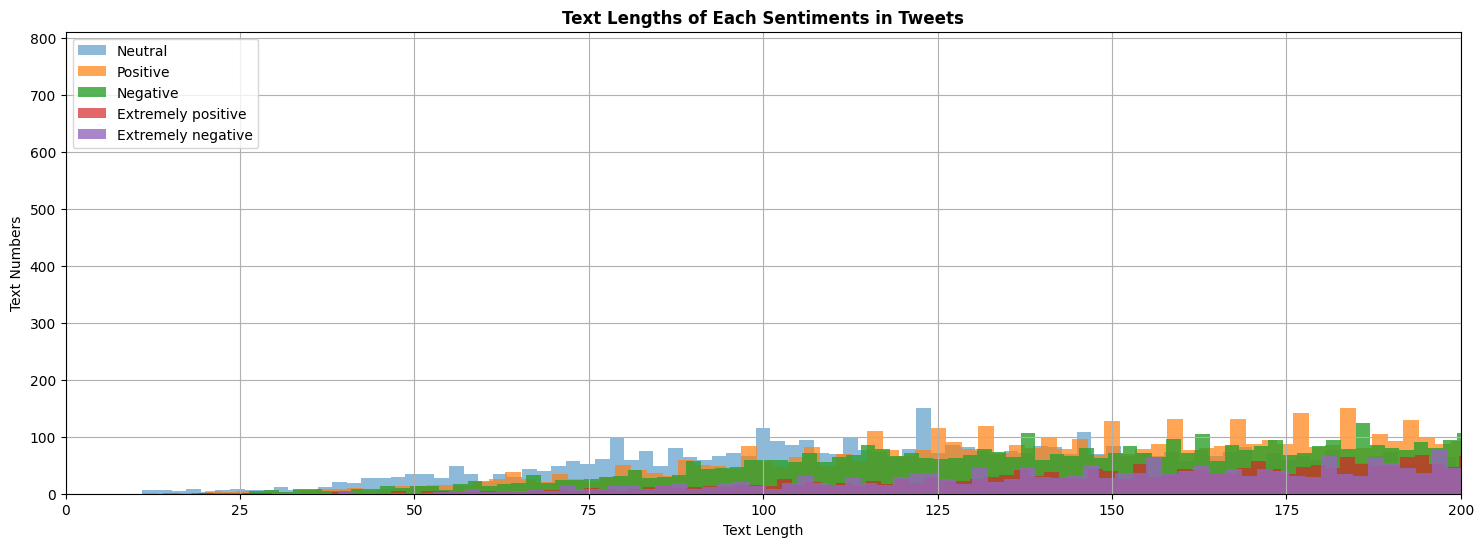

In [46]:
# Importing required library
from matplotlib.pylab import tile

# Writing the function
def length(text):
    '''a function which returns the length of text'''
    return len(text)
tt_df['length'] = tt_df['text'].apply(length)

plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(tt_df[tt_df['Sentiment'] == "Neutral"]['length'], alpha = 0.5, bins=bins, label='Neutral')
plt.hist(tt_df[tt_df['Sentiment'] == "Positive"]['length'], alpha = 0.7, bins=bins, label='Positive')
plt.hist(tt_df[tt_df['Sentiment'] == "Negative"]['length'], alpha = 0.8, bins=bins, label='Negative')
plt.hist(tt_df[tt_df['Sentiment'] == "Extremely Positive"]['length'], alpha = 0.7, bins=bins, label='Extremely positive')
plt.hist(tt_df[tt_df['Sentiment'] == "Extremely Negative"]['length'], alpha = 0.8, bins=bins, label='Extremely negative')

# Plot No - 7
# Plotting the data
plt.title('Text Lengths of Each Sentiments in Tweets', fontweight='bold')
plt.xlabel('Text Length')
plt.ylabel('Text Numbers')
plt.legend(loc='upper left')
plt.xlim(0,200)
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

**To find the text length of each sentiments**

##### 2. What is/are the insight(s) found from the chart?

we can clearly see that the neutral and the positive sentiments is  high

#### Chart - 8

In [47]:
# Chart - 8 visualization code

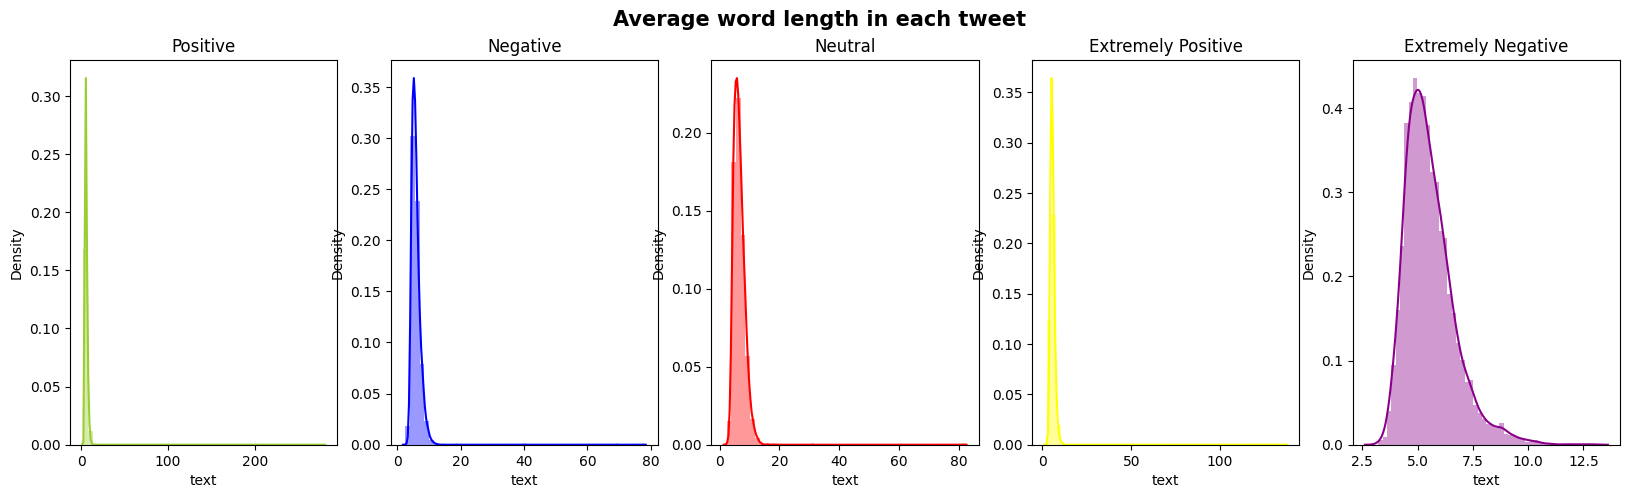

In [48]:
# Plot No - 8
# Finding the average word length in each tweet sentiment type.
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(20,5))
word= tt_df[tt_df['Sentiment']=="Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='yellowgreen')
ax1.set_title('Positive')

word= tt_df[tt_df['Sentiment']=="Negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='blue')
ax2.set_title('Negative')

word= tt_df[tt_df['Sentiment']=="Neutral"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='red')
ax3.set_title('Neutral')

word= tt_df[tt_df['Sentiment']=="Extremely Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax4,color='yellow')
ax4.set_title('Extremely Positive')

word= tt_df[tt_df['Sentiment']=="Extremely Negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax5,color='darkmagenta')
ax5.set_title('Extremely Negative')

# Showing the Plot

fig.suptitle('Average word length in each tweet', size=15,fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

**to find the average length in each tweet**

#### Chart - 9

In [49]:
# Chart - 9 visualization code

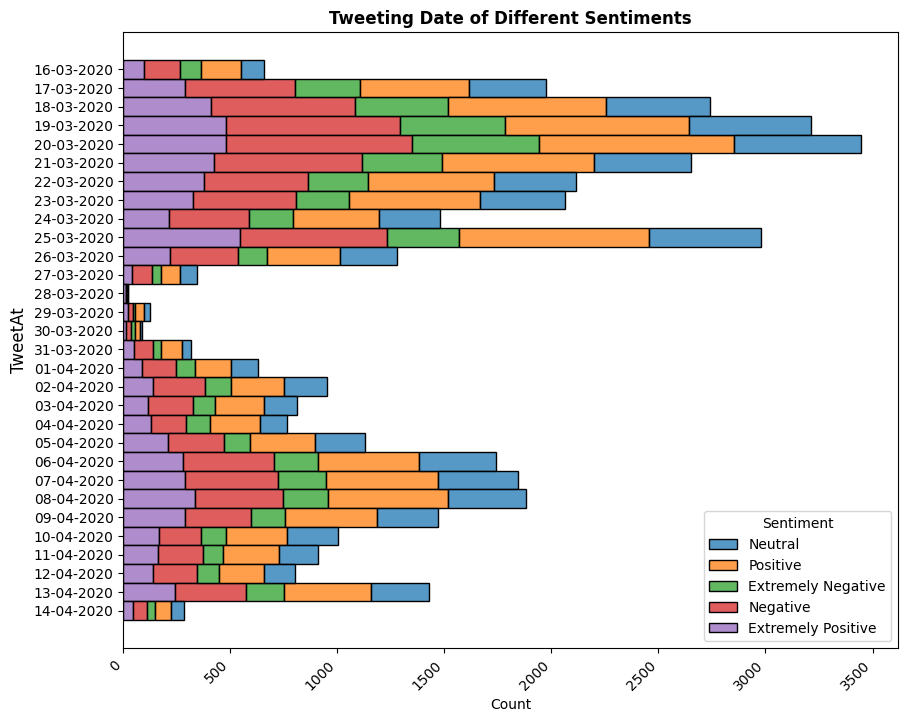

In [50]:
# Plot No- 9
# Plotting Tweet date with different sentiments
plt.figure(figsize=(10,8))
sns.histplot(data=tweet_df, y= "TweetAt", hue="Sentiment", multiple="stack")
plt.xticks(rotation=45, ha='right')
plt.title("Tweeting Date of Different Sentiments", fontweight='bold')
plt.ylabel("TweetAt",fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

Looking occurance times between different tweeting date and sentiments associated with that particular date

##### 2. What is/are the insight(s) found from the chart?

The above plot shows the distribution of different sentiments on the basis of tweeting date (TweetAt - column).

Here it can be analysied that date on 20-03-2020, when maximum tweet took place showing the maximum sentiment types.

 Among all the sentiments, positive sentiment dominates the most followed by the negative in second place.

Least tweeting date is 28-03-2020, according to plot, where the number of sentiments is also very less in compare to other dates.

The number of extremely positive sentiment tweet can be observed on 25-03-2020.
In same way maximum neutral sentiment tweeted on 20-03-2020.

Extremely positive sentiment tweeted most on 25-03-2020 whereas extremely negative sentiment tweeted most on 20-03-2020.

By seeing all the insight, it can be sensed that this period on 30 days or 1 month, most number of tweets can been seen in the month of March in compare to April month for year 2020.

This period is also important because from the month of March globally the number COVID-19 cases started, which triggered many people.

#### Chart - 10

In [51]:
# Chart - 10 visualization code

In [52]:
# Creating the corpus from the sentiment & text column and appending them

# Importing the required library
from collections import defaultdict


def create_corpus(target):
    corpus=[]

    for x in tt_df[tt_df['Sentiment']==target ]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

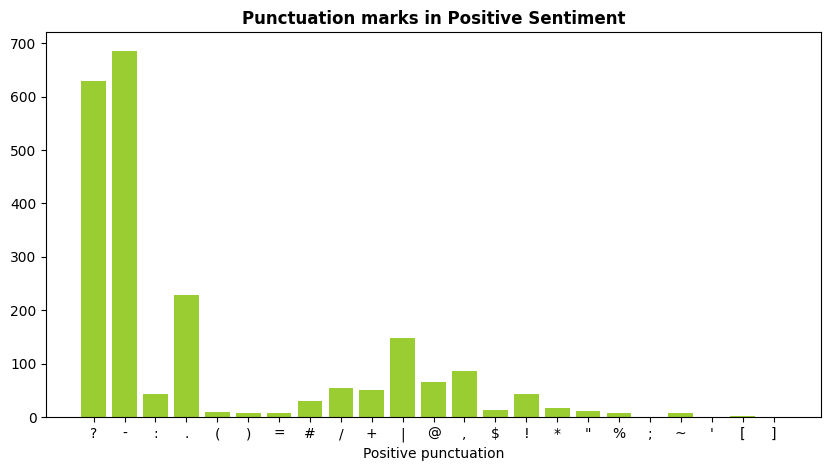

In [53]:
# Creating the collection for each sentiment having different punctuation marks for "Positive Sentiment"
corpus= create_corpus("Positive")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

# Plot No - 10
# Plotting the required dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='yellowgreen')
plt.xlabel('Positive punctuation')
plt.title('Punctuation marks in Positive Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

**To get the punctuation mark in positive sentiments**

#### Chart - 11

In [54]:
# Chart - 11 visualization code

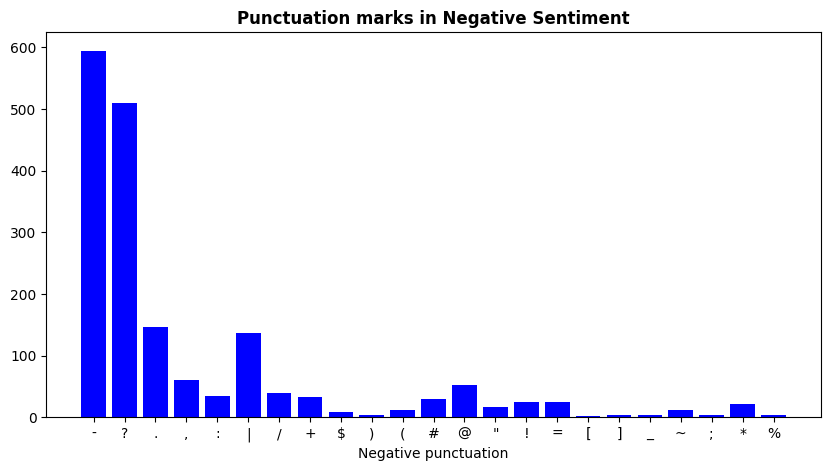

In [55]:
# Creating the collection for each sentiment having different punctuation marks for "Negative Sentiment"
corpus=create_corpus("Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

# Plot No - 11
# Plotting the required dataset
plt.figure(figsize=(10,5))
plt.bar(x,y, color='blue')
plt.xlabel('Negative punctuation')
plt.title('Punctuation marks in Negative Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

**To get the punctuation mark in Negative Punctuation**

#### Chart - 12

In [56]:
# Chart - 12 visualization code

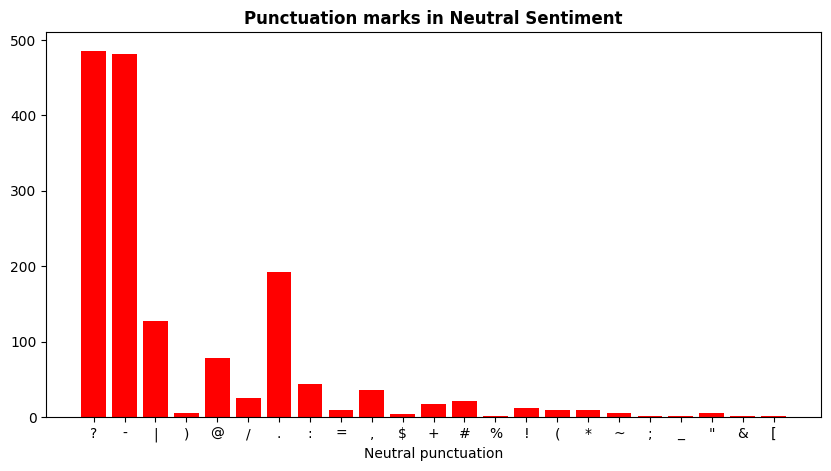

In [57]:
# Creating the collection for each sentiment having different punctuation marks for "Neutral Sentiment"
corpus=create_corpus("Neutral")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

# Plot No - 12
# Plotting the required dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='red')
plt.xlabel('Neutral punctuation')
plt.title('Punctuation marks in Neutral Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

**To get the punctuation mark in Neutral sentiments**

Answer Here

#### Chart - 13

In [58]:
# Chart - 13 visualization code

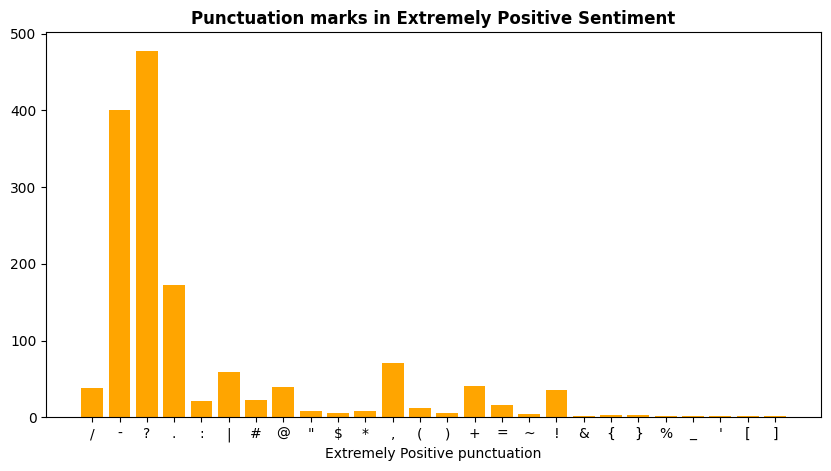

In [59]:
# Creating the collection for each sentiment having different punctuation marks for "Extremely Positive Sentiment"
corpus=create_corpus("Extremely Positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

# Plot No - 13
# Plotting the required dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='orange')
plt.xlabel('Extremely Positive punctuation')
plt.title('Punctuation marks in Extremely Positive Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

**To get the punctuation mark in Extremely Positive sentiments**

## ***6. Feature Engineering & Data Pre-processing***

#Short Overview: The preprocessing of the text data is an essential step as it makes the raw text ready for mining.

The objective of this step is to clean noise those are less relevant to find
the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.


As mentioned earlier, the tweets contain lots of twitter handles (@user). We will remove all these twitter handles from the data as they don’t convey much information.

We are having twitter links in the data which are not useful for our Model. It will make our data noisy.

As discussed, punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles,links and hashtags.

Stop words are those words in natural language that have a very little meaning, such as "is", "an", "the", etc.To remove stop words from a sentence, you can divide your text into words and then remove the word if it exits in the list of stop words provided by NLTK.

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “ed”, “s” etc) from a word. For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

In tokenization we convert group of sentence into token . It is also called text segmentation or lexical analysis. It is basically splitting data into small chunk of words. Tokenization in python can be done by python NLTK library’s word_tokenize() function.

In [60]:
# Text Cleaning
twt_df = tweet_df.copy()
# twt_df['OriginalTweet']

In [61]:
#Remove @person character
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [62]:
# Removing url, http, etc.
# create new column with removed @user
twt_df['Clean_tweet'] = np.vectorize(remove_pattern)(twt_df['OriginalTweet'], '@[\w]*')
twt_df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

                                         Clean_tweet  
0     https://t.co/iFz9FAn2Pa and https://t.co/xX...  
1  advice Talk to your neighbours family to excha...  
2  Coronavirus Australia: Woolworths to give elde...  
3  My food stock is not the only one which is emp...  
4  Me, ready to go at supermarket during the #COV...

In [63]:
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
twt_df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

                                         Clean_tweet  
0                                                     
1  advice Talk to your neighbours family to excha...  
2  Coronavirus Australia: Woolworths to give elde...  
3  My food stock is not the only one which is emp...  
4  Me, ready to go at supermarket during the #COV...

In [64]:
# Remove punctions, words wich are not formed letters
# remove special characters, numbers, punctuations
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].str.replace('[^a-zA-Z#]+',' ')
twt_df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

                                         Clean_tweet  
0                                                     
1  advice Talk to your neighbours family to excha...  
2  Coronavirus Australia Woolworths to give elder...  
3  My food stock is not the only one which is emp...  
4  Me ready to go at supermarket during the #COVI...

In [65]:
# Removing short words
# remove short words
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
twt_df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

                                         Clean_tweet  
0                                                     
1  advice Talk your neighbours family exchange ph...  
2  Coronavirus Australia Woolworths give elderly ...  
3  food stock not the only one which empty PLEASE...  
4  ready supermarket during the #COVID outbreak N...

In [66]:
# Removing stopwords
# Downloading stopwords library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [68]:
## Function to remove stopwords

def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text.split() if word.lower() not in sw]

  # joining the list of words with space separator
  return " ".join(text)

In [69]:
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(remove_stopwords)

In [70]:
# Obtaining top 5 rows after stopwords removal
twt_df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

                                         Clean_tweet  
0                                                     
1  advice talk neighbours family exchange phone n...  
2  coronavirus australia woolworths give elderly ...  
3  food stock one empty please panic enough food ...  
4  ready supermarket #covid outbreak paranoid foo...

In [71]:
# Converting text data to lowercase
# Creating lower case
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [72]:
# Stemming
#Importing libraries to perform stemming operation
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [73]:
twt_df['Clean_tweet']= twt_df['Clean_tweet'].apply(stemming)
twt_df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

                                         Clean_tweet  
0                                                     
1  advic talk neighbour famili exchang phone numb...  
2  coronavirus australia woolworth give elder dis...  
3  food stock one empti pleas panic enough food e...  
4  readi supermarket #covid outbreak paranoid foo...

# Importance of Hashtags on Tweet Sentiments

In [74]:
# Using function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [75]:
# Extracting hashtags from different tweets as per sentiments
Htg_Extremely_Positive = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Extremely Positive'])
Htg_Positive = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Positive'])
Htg_Neutral = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Neutral'])
Htg_Negative = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Negative'])
Htg_Extremely_Negative = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Extremely Negative'])

In [76]:
# Unnesting list
Htg_Extremely_Positive = sum(Htg_Extremely_Positive, [])
Htg_Positive = sum(Htg_Positive, [])
Htg_Neutral = sum(Htg_Neutral, [])
Htg_Negative = sum(Htg_Negative,[])
Htg_Extremely_Negative = sum(Htg_Extremely_Negative,[])

In [77]:
# Printing the result
print("Hashtag Extremely Positive Words : ", Htg_Extremely_Positive)
print("Hashtag Positive Words : ", Htg_Positive)
print("Hashtag Neutral Words : ", Htg_Neutral)
print("Hashtag Negative Words : ", Htg_Negative)
print("Hashtag Extremely Negative Words : ", Htg_Extremely_Negative)

Hashtag Extremely Positive Words :  ['horningsea', 'COVID2019', 'Trials', 'Monthly', 'Yearly', 'Prices', 'Subscriptions', 'bestiptv', 'iptv', 'Service', 'Iptv', 'iptvdeals', 'Cheap', 'ipTV', 'Football', 'HD', 'Movies', 'Adult', 'Cinema', 'hotmovies', 'iptvnew', 'iptv2020', 'Adult', 'COVID2019', 'Trials', 'Monthly', 'Yearly', 'Prices', 'Subscriptions', 'bestiptv', 'iptv', 'Service', 'Iptv', 'iptvdeals', 'Cheap', 'ipTV', 'Football', 'HD', 'Movies', 'Adult', 'Cinema', 'hotmovies', 'ipTv', '18Movies', 'consumer', 'covid19', 'tracker', 'BreakingNews', 'Breaking', 'Coronavirus', 'CoronavirusOutbreak', 'COVID19', 'COVID', 'COVID_19', 'COVID2019', 'Collapse', 'CoronavirusOutbreak', 'coronavirus', 'COVID2019', 'jlmco', 'jlmcobrand', 'coronapocolypse', 'coronavirus', 'CoronavirusOutbreak', 'COVID19', 'shoponline', 'coronavirus', 'COVID19', 'peoplearelosingtheirminds', 'StopTheMadness', 'stoppanicbuying', 'coronavirus', 'StopPanicBuying', 'BeKind', 'mufc', 'MUFC_Family', 'Malaysia2020', 'Malaysia

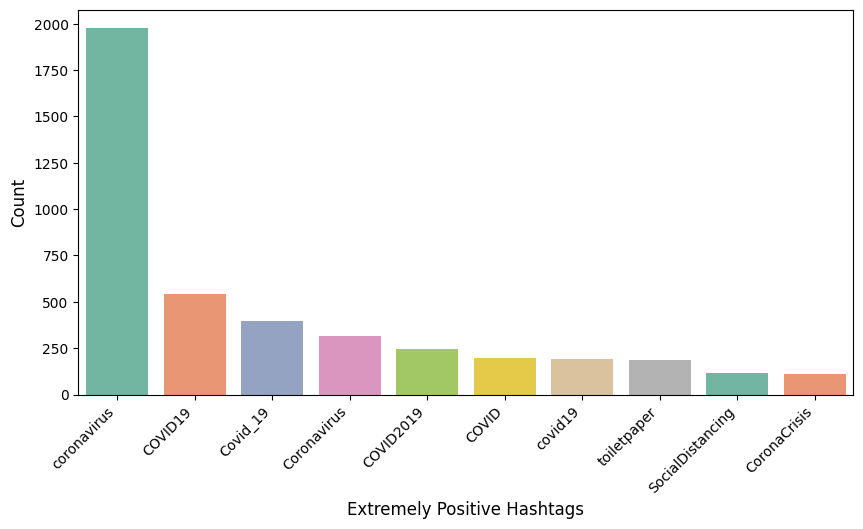

In [78]:
# Making frequency distribution of top 10 Extremely Positive hashtags
a = nltk.FreqDist(Htg_Extremely_Positive)

#Creating dataframe
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})
d = d.nlargest(columns = 'Count', n = 10)

# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count',palette= 'Set2')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Extremely Positive Hashtags",fontsize = 12)
plt.show()

**The above bar plot shows the top 10 most occuring "Hashtags" for extremely positive sentiment tweets.**

**"Coronavirus" trends the most among the other hashtags and its count value ranged between 1750 and 2000.**

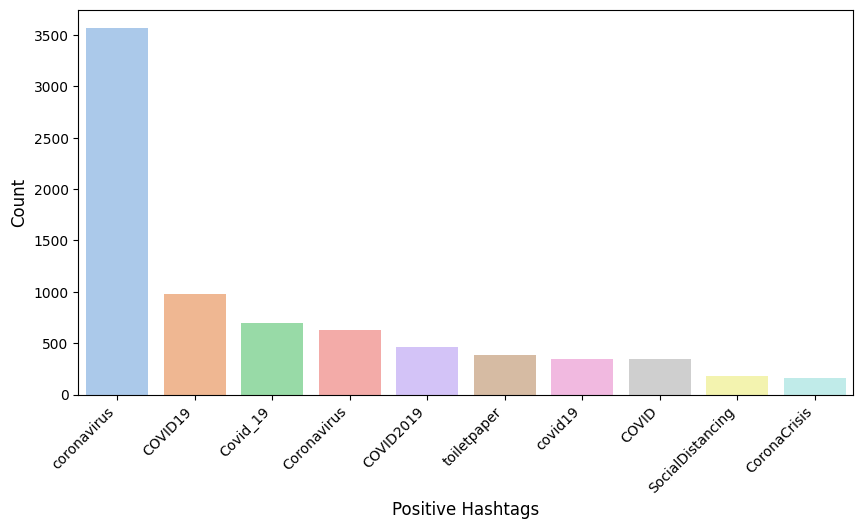

In [79]:
# Making frequency distribution top 10 Positive hashtags
b = nltk.FreqDist(Htg_Positive)

#Creating dataframe
d = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count' : list(b.values())})
d = d.nlargest(columns = 'Count', n = 10)

# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count',palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Positive Hashtags",fontsize = 12)
plt.show()

**The above bar plot shows the top 10 most occuring "Hashtags" for positive sentiment tweets.**

**Coronavirus" trends the most among the other hashtags and its count value reached above 3500 and more.**

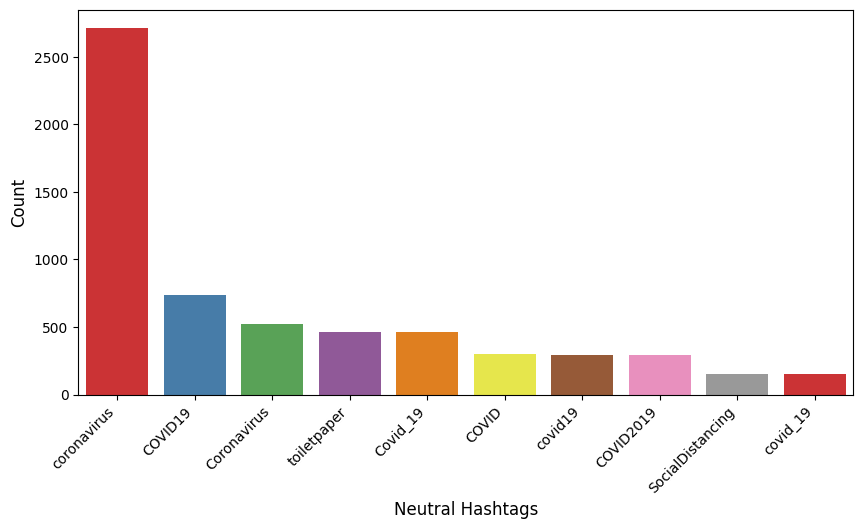

In [80]:
# making frequency distribution top 10 Neutral hashtags
c = nltk.FreqDist(Htg_Neutral)

#Creating dataframe
d = pd.DataFrame({'Hashtag': list(c.keys()),
                  'Count' : list(c.values())})
d = d.nlargest(columns = 'Count', n = 10)


# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count', palette='Set1')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Neutral Hashtags",fontsize = 12)
plt.show()

**The above bar plot shows the top 10 most occuring "Hashtags" for neutral sentiment tweets.**

**"Coronavirus" trends the most among the other hashtags and its count value reached above 2500 and more.**

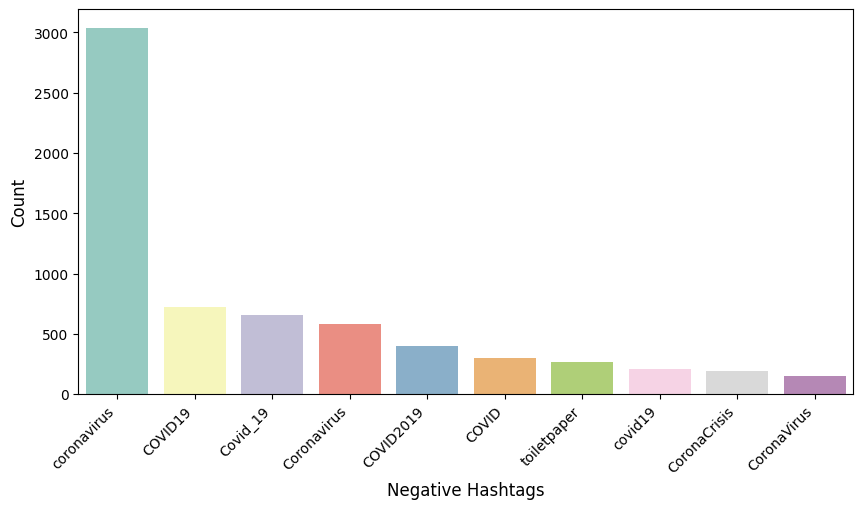

In [81]:
# making frequency distribution top 10 Negative hashtags
e = nltk.FreqDist(Htg_Negative)

#Creating dataframe
d = pd.DataFrame({'Hashtag': list(e.keys()),
                  'Count' : list(e.values())})
d = d.nlargest(columns = 'Count', n = 10)

# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Negative Hashtags",fontsize = 12)
plt.show()

**The above bar plot shows the top 10 most occuring "Hashtags" for negative sentiment tweets.**


**"Coronavirus" trends the most among the other hashtags and its count value reached most at around 3000.**

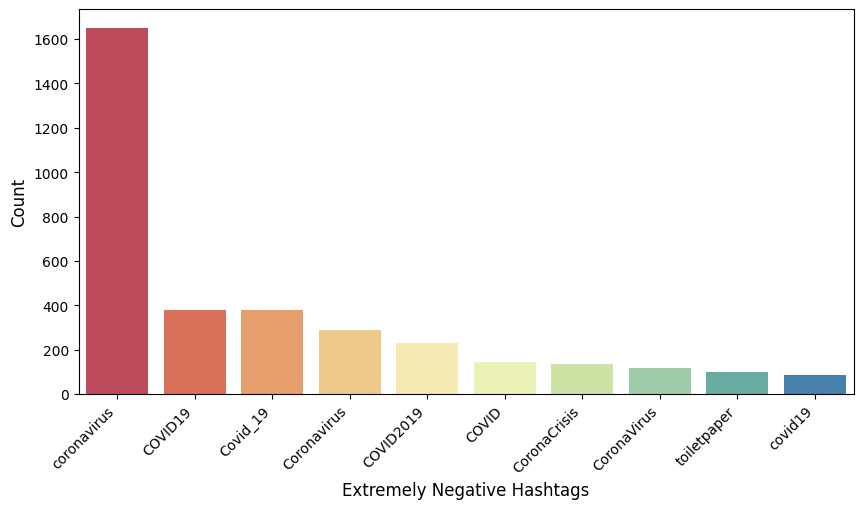

In [82]:
# making frequency distribution top 10 Extremely Negative hashtags
f = nltk.FreqDist(Htg_Extremely_Negative)

#Creating dataframe
d = pd.DataFrame({'Hashtag': list(f.keys()),
                  'Count' : list(f.values())})
d = d.nlargest(columns = 'Count', n = 10)

# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count', palette='Spectral')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Extremely Negative Hashtags",fontsize = 12)
plt.show()

**The above bar plot shows the top 10 most occuring "Hashtags" for extremely negative sentiment tweets.**

**"Coronavirus" trends the most among the other hashtags and its count value reached most at around 1600.**

In [83]:
# Creating new dataframe
twt1_df = twt_df[['Clean_tweet', 'Sentiment']]
twt1_df.head(10)

Clean_tweet           Sentiment
0                                                                Neutral
1  advic talk neighbour famili exchang phone numb...            Positive
2  coronavirus australia woolworth give elder dis...            Positive
3  food stock one empti pleas panic enough food e...            Positive
4  readi supermarket #covid outbreak paranoid foo...  Extremely Negative
5  news region first confirm covid case came sull...            Positive
6  cashier groceri store share insight #covid pro...            Positive
7  supermarket today buy toilet paper #rebel #toi...             Neutral
8  due covid retail store classroom atlanta open ...            Positive
9  corona prevent stop buy thing cash use onlin p...            Negative

In [84]:
# Most Common words
from collections import Counter
cnt = Counter()
for text in twt1_df.Clean_tweet.values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('#coronavirus', 14155),
 ('#covid', 10673),
 ('covid', 10574),
 ('price', 8911),
 ('store', 8207),
 ('supermarket', 7297),
 ('food', 6996),
 ('groceri', 6496),
 ('peopl', 5594),
 ('amp', 5115)]

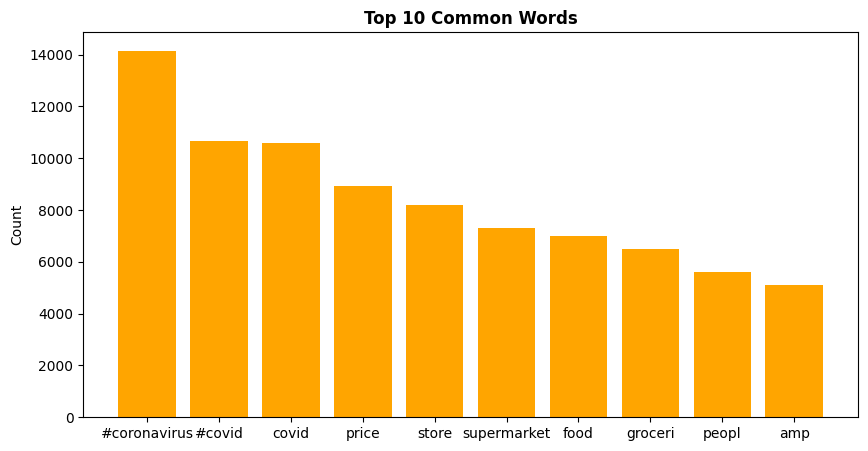

In [85]:

# Creating top 10 common words used in the tweets
com= sorted(cnt.most_common(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*com)
plt.figure(figsize = (10,5))
plt.bar(x,y, color='orange')
plt.title('Top 10 Common Words', fontweight='bold')
plt.ylabel('Count')
plt.show()

In [86]:
# Importing the required libraries for Word Cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import os
from os import path

**Here we are representing the most occuring words in our dataset in common first. Further word cloud of each sentiments has also showen, which help us to analyse which words are used frequently for each of the sentiments, respectively.**

In [87]:
# Creating new dataframe
cld_df = twt_df[['Clean_tweet', 'Sentiment']]
cld_df.head(3)

Clean_tweet Sentiment
0                                                      Neutral
1  advic talk neighbour famili exchang phone numb...  Positive
2  coronavirus australia woolworth give elder dis...  Positive

In [88]:
# Encoding the sentiments from 0 to 4 i.e., from extremely positive to extremely negative
sentiment_map = {"Extremely Negative":4, "Negative":3, "Neutral":2, "Positive":1,"Extremely Positive":0}
cld_df['Sentiment'] = cld_df['Sentiment'].map(sentiment_map)

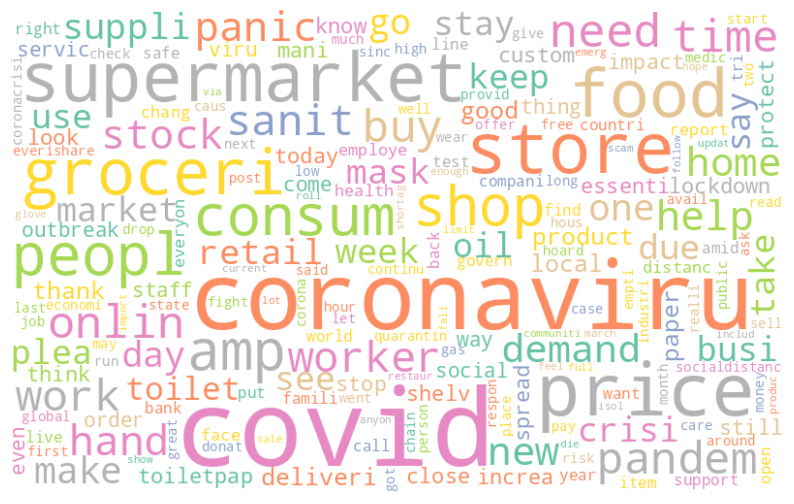

In [89]:
# Most occuring words of all in Tweets
all_words = ' '.join([text for text in cld_df.Clean_tweet])
wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS), colormap='Set2', collocations=False,).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


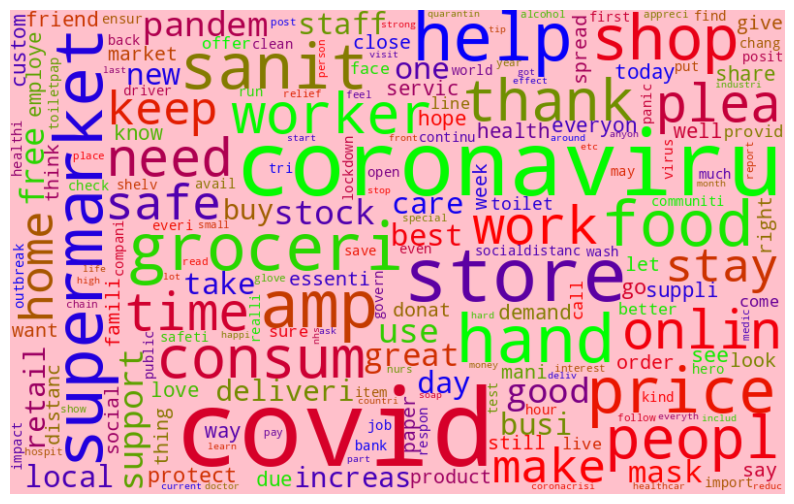

In [90]:
# Most common occuring words in "Extremely Positive" sentiment
Extremely_Positive =' '.join([text for text in cld_df['Clean_tweet'][cld_df['Sentiment'] == 0]])

wordcloud = WordCloud(background_color = "pink", width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS),colormap='brg', collocations=False).generate(Extremely_Positive)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

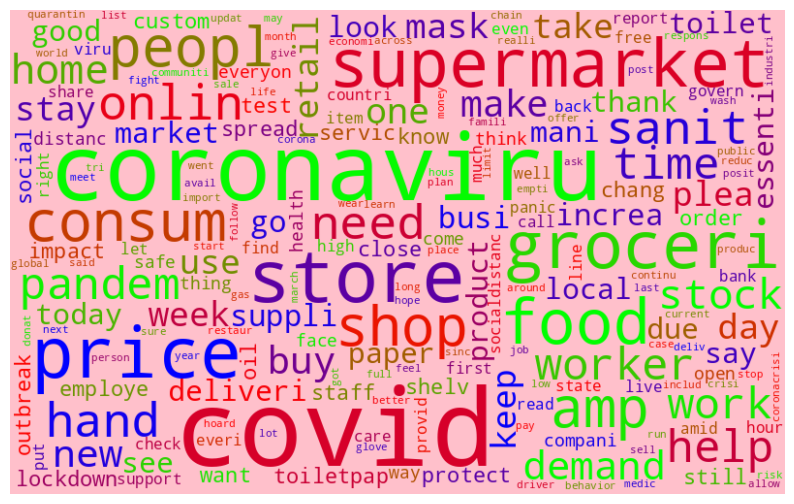

In [91]:
# Most common occuring words in "Positive" sentiment
Positive =' '.join([text for text in cld_df['Clean_tweet'][cld_df['Sentiment'] == 1]])

wordcloud = WordCloud(background_color = "pink", width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS),colormap='brg',collocations=False).generate(Positive)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

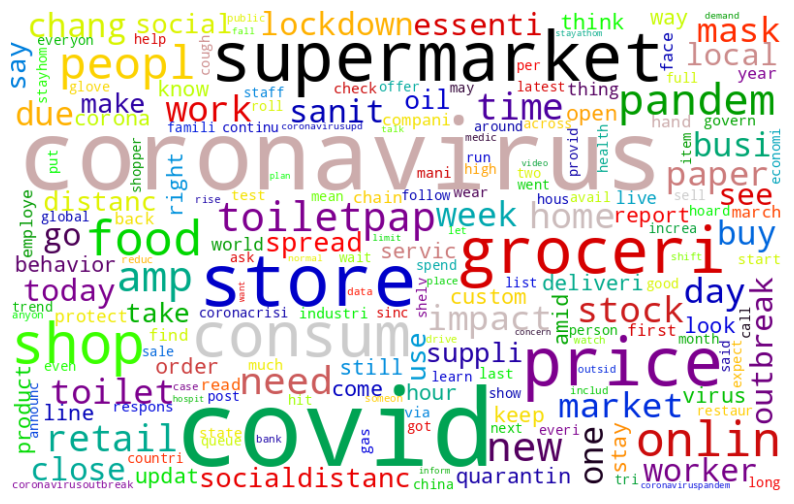

In [92]:
# Most common occuring words in "Neutral" sentiment
Neutral =' '.join([text for text in cld_df['Clean_tweet'][cld_df['Sentiment'] == 2]])

wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS),colormap='nipy_spectral',collocations=False).generate(Neutral)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

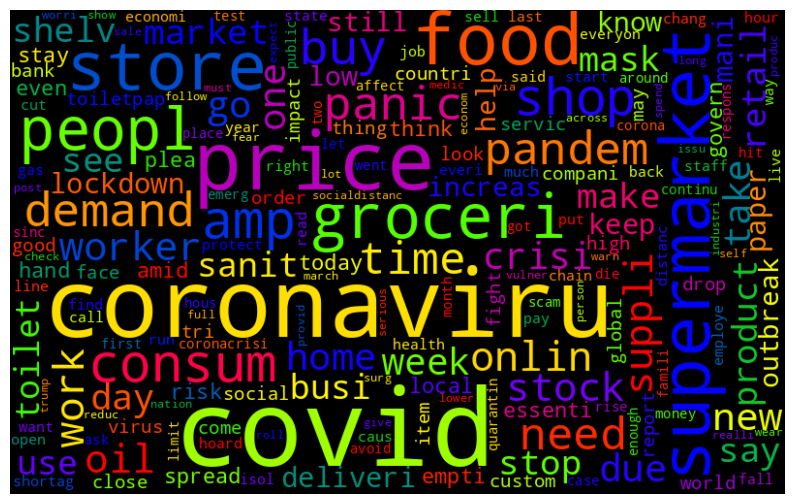

In [93]:
# Most common occuring words in "Negative" sentiment
Negative =' '.join([text for text in cld_df['Clean_tweet'][cld_df['Sentiment'] == 3]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS),colormap='prism',collocations=False).generate(Negative)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

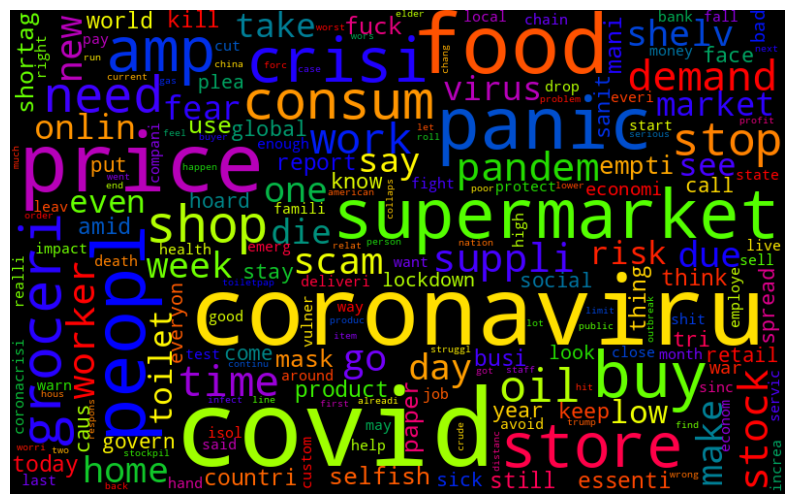

In [94]:
# Most common occuring words in "Extremely Negative" sentiment
Extremely_Negative =' '.join([text for text in cld_df['Clean_tweet'][cld_df['Sentiment'] == 4]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS),colormap='prism',collocations=False).generate(Extremely_Negative)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [95]:
# Encoding the sentiments from -1, 0 and 1 i.e., from extremely positive to extremely negative
sentiment_map = {"Extremely Negative":-1, "Negative":-1, "Neutral":0, "Positive":1,"Extremely Positive":1}
twt1_df['Sentiment'] = twt1_df['Sentiment'].map(sentiment_map)

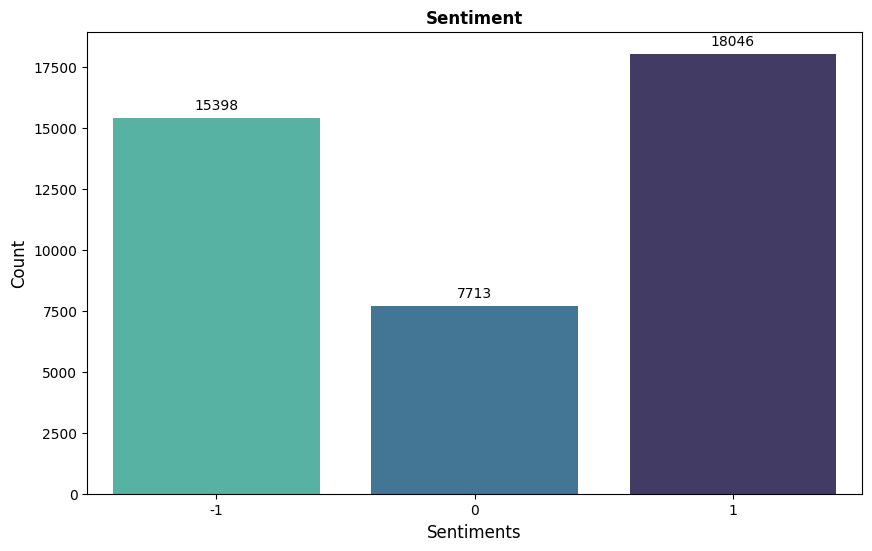

In [96]:
# Plotting the Encoded Sentiments value as countplot
plt.figure(figsize=(10,6))
splot = sns.countplot(x='Sentiment', data=twt1_df,palette="mako_r")
# adding annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0,9), textcoords = 'offset points')
plt.title("Sentiment", fontweight='bold')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Sentiments",fontsize = 12)
plt.show()

## ***7. ML Model Implementation***

In [97]:
# Importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split

#Train-Test Split

In [98]:

#stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
train,valid = train_test_split(twt1_df,test_size = 0.2,random_state=0,stratify = twt1_df.Sentiment.values)

#Printing the result
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


# Counter Vectorizer For Multi Class Classification

In [99]:
# Importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
# Applying stopwards and CountVectorizer for NLP
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

# Fitting using transform
X_train = vectorizer.fit_transform(train.Clean_tweet.values)
X_valid = vectorizer.transform(valid.Clean_tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

# Printing the shape of train and test(valid) values
print("X_train.shape : ", X_train.shape)
print("X_valid.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 27016)
X_valid.shape :  (8232, 27016)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


# Application of Models along with its Confusion Matrix

In [100]:
# importing library
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import f1_score

plt.rcParams["figure.figsize"] = (8,6)
labels = ['Negative', 'Neutral', 'Positive']

# Naive Bayes Classifier for multiclass

In [101]:
# Importing library
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB() # class instantiation

# Fitting the model train dataset so that model can learn parameter which is used in prediction
naiveByes_clf.fit(X_train,y_train)

MultinomialNB()

In [102]:
# Predicting the train and test
y_pred_NB_valid = naiveByes_clf.predict(X_valid)
y_pred_NB_train = naiveByes_clf.predict(X_train)

# Checking accuracy
NB_accuracy = accuracy_score(y_valid,y_pred_NB_valid)

# Printing the result
print("Train accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(y_pred_NB_valid,y_valid))

Train accuracy Score    :  0.7802277904328018
Validation accuracy Score :  0.6839164237123421
              precision    recall  f1-score   support

          -1       0.76      0.68      0.72      3441
           0       0.26      0.70      0.38       577
           1       0.80      0.68      0.74      4214

    accuracy                           0.68      8232
   macro avg       0.61      0.69      0.61      8232
weighted avg       0.75      0.68      0.70      8232



[[10207   274  1837]
 [ 1249  2908  2013]
 [ 1579   284 12574]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

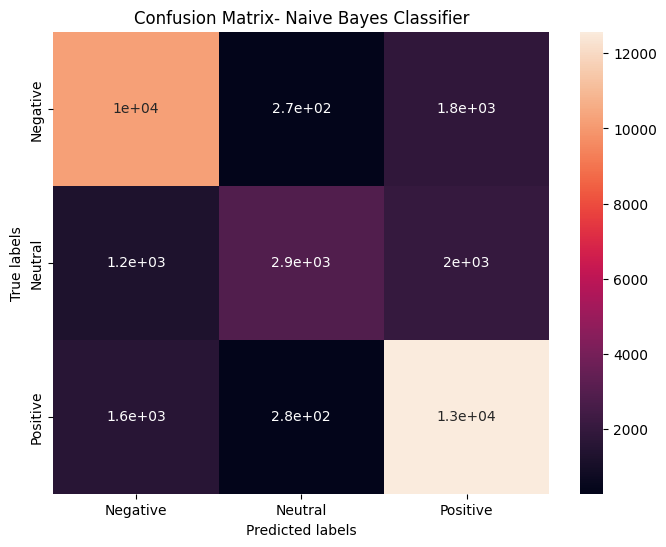

In [103]:
# Confusion Matrix
cm = confusion_matrix(y_train,y_pred_NB_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Naive Bayes Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [104]:
# Model Performance
NB_precision = precision_score(y_pred_NB_valid,y_valid, average ='weighted')
NB_recall = recall_score(y_pred_NB_valid,y_valid,average ='weighted')
NB_f1_score = f1_score(y_pred_NB_valid,y_valid,average ='weighted')
print(NB_precision, NB_recall, NB_f1_score)

0.7451890596707511 0.6839164237123421 0.7043410518776516


# Stochastic Gradient Descent-SGD Classifier

# Hyperparameter tuning

In [105]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

param_grid ={}

# fitting parameter with Cross Validation
grid_sgd = GridSearchCV(sgd_clf, param_grid, verbose = 3, cv = 5)

grid_sgd.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.803 total time=   0.6s
[CV 2/5] END ..................................., score=0.813 total time=   0.5s
[CV 3/5] END ..................................., score=0.809 total time=   0.6s
[CV 4/5] END ..................................., score=0.800 total time=   0.5s
[CV 5/5] END ..................................., score=0.804 total time=   0.6s


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=0), param_grid={},
             verbose=3)

In [106]:
# prediction
y_pred_sgd_valid = grid_sgd.predict(X_valid)
y_pred_sgd_train = grid_sgd.predict(X_train)

# checking accuracy and printing classification report
sgd_accuracy = accuracy_score(y_valid,y_pred_sgd_valid)

print("Train accuracy Score    : ",grid_sgd.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(y_pred_sgd_valid,y_valid))

Train accuracy Score    :  0.9167501898253607
Validation accuracy Score :  0.810374149659864
              precision    recall  f1-score   support

          -1       0.81      0.83      0.82      3033
           0       0.72      0.71      0.72      1559
           1       0.85      0.84      0.84      3640

    accuracy                           0.81      8232
   macro avg       0.79      0.79      0.79      8232
weighted avg       0.81      0.81      0.81      8232



[[11356   332   630]
 [  373  5352   445]
 [  585   376 13476]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

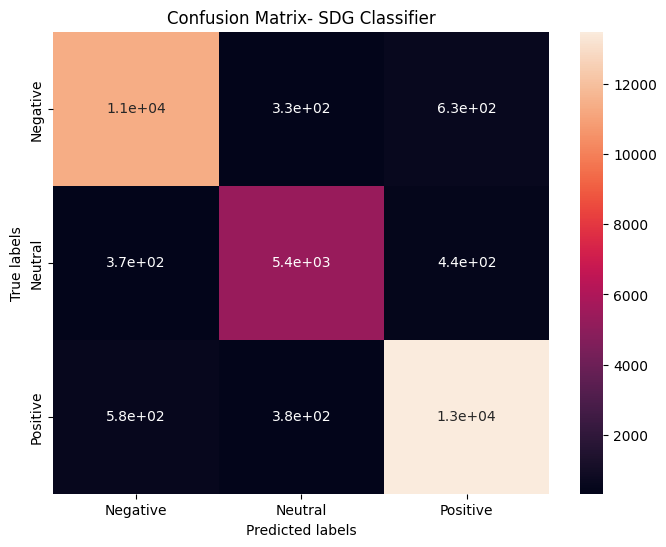

In [107]:
# Confusion Matrix
cm1 = confusion_matrix(y_train, y_pred_sgd_train)
print(cm1)

ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- SDG Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [108]:
# Model Performance
sgd_precision = precision_score(y_pred_sgd_valid,y_valid, average ='weighted')
sgd_recall = recall_score(y_pred_sgd_valid,y_valid,average ='weighted')
sgd_f1_score = f1_score(y_pred_sgd_valid,y_valid,average ='weighted')
print(sgd_precision, sgd_recall, sgd_f1_score)

0.810311570483051 0.810374149659864 0.8103145760253739


# Random Forest Classifier

In [109]:
# importing library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Hyperparameter tuning

# creating param dict to check diffirent value of parameter
grid_values = {'n_estimators':[60,80,100],
               'max_depth':[100,200,300]}

#fit the parameter with Cross Validation
rf_clf = GridSearchCV(RandomForestClassifier(), param_grid= grid_values,verbose= 3, cv=5, scoring ='accuracy')
#training model
rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....max_depth=100, n_estimators=60;, score=0.715 total time=  41.3s
[CV 2/5] END ....max_depth=100, n_estimators=60;, score=0.712 total time=  40.6s
[CV 3/5] END ....max_depth=100, n_estimators=60;, score=0.711 total time=  41.9s
[CV 4/5] END ....max_depth=100, n_estimators=60;, score=0.701 total time=  40.5s
[CV 5/5] END ....max_depth=100, n_estimators=60;, score=0.708 total time=  40.7s
[CV 1/5] END ....max_depth=100, n_estimators=80;, score=0.715 total time=  54.5s
[CV 2/5] END ....max_depth=100, n_estimators=80;, score=0.713 total time=  53.7s
[CV 3/5] END ....max_depth=100, n_estimators=80;, score=0.723 total time=  53.9s
[CV 4/5] END ....max_depth=100, n_estimators=80;, score=0.702 total time=  56.3s
[CV 5/5] END ....max_depth=100, n_estimators=80;, score=0.710 total time=  53.5s
[CV 1/5] END ...max_depth=100, n_estimators=100;, score=0.710 total time= 1.1min
[CV 2/5] END ...max_depth=100, n_estimators=100;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [100, 200, 300],
                         'n_estimators': [60, 80, 100]},
             scoring='accuracy', verbose=3)

In [110]:
print(rf_clf.best_params_)
print(rf_clf.best_estimator_)

{'max_depth': 300, 'n_estimators': 100}
RandomForestClassifier(max_depth=300)


In [111]:
#prediction
y_pred_rf_train = rf_clf.predict(X_train)
y_pred_rf_valid = rf_clf.predict(X_valid)

rf_accuracy = accuracy_score(y_valid, y_pred_rf_valid)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(y_pred_rf_valid,y_valid))

Training accuracy Score    :  0.9907668944570994
Validation accuracy Score :  0.760689990281827
              precision    recall  f1-score   support

          -1       0.74      0.79      0.76      2858
           0       0.69      0.66      0.67      1601
           1       0.81      0.78      0.79      3773

    accuracy                           0.76      8232
   macro avg       0.75      0.74      0.74      8232
weighted avg       0.76      0.76      0.76      8232



[[12179   136     3]
 [    2  6167     1]
 [    4   158 14275]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

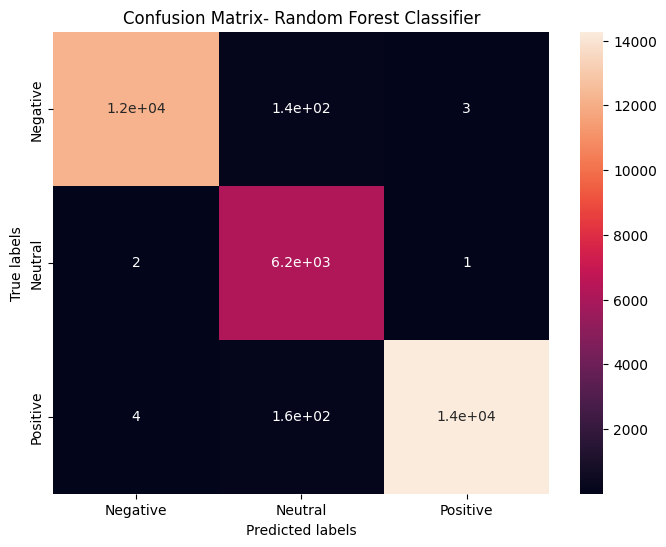

In [132]:
# Confusion Matrix
cm2 = confusion_matrix(y_train, y_pred_rf_train)
print(cm2)


ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [113]:
# Model Performance
rf_precision = precision_score(y_pred_rf_valid,y_valid, average ='weighted')
rf_recall = recall_score(y_pred_rf_valid,y_valid,average ='weighted')
rf_f1_score = f1_score(y_pred_rf_valid,y_valid,average ='weighted')
print(rf_precision, rf_recall, rf_f1_score)

0.761854804158315 0.760689990281827 0.7606765090750601


# Support vector machine

In [114]:
#import the packages
from sklearn.svm import SVC
svc_clf =SVC (kernel ='linear',verbose = 3)
svc_clf.fit(X_train, y_train) # model fitting on train dataset

[LibSVM]

SVC(kernel='linear', verbose=3)

In [115]:
# Get the predicted classes
y_pred_svc_train = svc_clf.predict(X_train)
y_pred_svc_valid = svc_clf.predict(X_valid)
# checking accuracy and printing the classification report
svm_accuracy = accuracy_score(y_valid, y_pred_svc_valid)
print("Training accuracy Score    : ",svc_clf.score(X_train,y_train))
print("Validation accuracy Score : ",svm_accuracy )
print(classification_report(y_pred_svc_valid,y_valid))

Training accuracy Score    :  0.9517691723614274
Validation accuracy Score :  0.7945821185617103
              precision    recall  f1-score   support

          -1       0.81      0.80      0.80      3126
           0       0.70      0.70      0.70      1545
           1       0.82      0.84      0.83      3561

    accuracy                           0.79      8232
   macro avg       0.78      0.78      0.78      8232
weighted avg       0.79      0.79      0.79      8232



[[11793   175   350]
 [  234  5702   234]
 [  365   230 13842]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

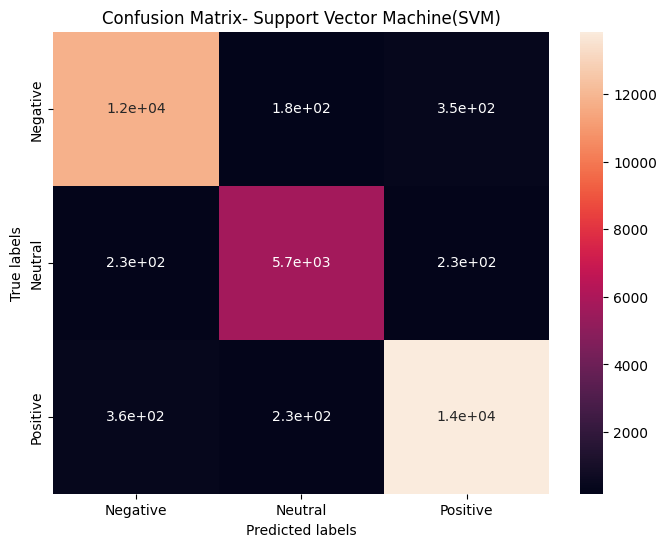

In [116]:
# Confusion Matrix
cm3 = confusion_matrix(y_train, y_pred_svc_train)
print(cm3)


ax= plt.subplot()
sns.heatmap(cm3, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Support Vector Machine(SVM)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [117]:
# Model Performance
svc_precision = precision_score(y_pred_svc_valid,y_valid, average ='weighted')
svc_recall = recall_score(y_pred_svc_valid,y_valid,average ='weighted')
svc_f1_score = f1_score(y_pred_svc_valid,y_valid,average ='weighted')
print(svc_precision, svc_recall)

0.7944572908964623 0.7945821185617103


# Logistic Regression

In [118]:
# importing required library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Hyperparameter tuning

logistic = LogisticRegression() # class instantiation

#set the hyperparmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500, 1000] }


#fit the hyperparameter with Cross Validation
grid_lr = GridSearchCV(LogisticRegression(), param_grid, n_jobs = -1, verbose = 3, cv = 5)
#training model
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500,
                               1000],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [119]:
print(grid_lr.best_score_)
print(grid_lr.best_params_)

0.7933788914198937
{'C': 0.5, 'penalty': 'l2'}


In [120]:
#prediction
y_pred_lr_train = grid_lr.predict(X_train)
y_pred_lr_valid = grid_lr.predict(X_valid)
# checking accuracy and printing classification report
lr_accuracy = accuracy_score(y_valid, y_pred_lr_valid)
print("Training accuracy Score    : ",grid_lr.score(X_train,y_train))
print("Validation accuracy Score : ",lr_accuracy )
print(classification_report(y_pred_lr_valid,y_valid))

Training accuracy Score    :  0.9171146545178436
Validation accuracy Score :  0.798712342079689
              precision    recall  f1-score   support

          -1       0.81      0.82      0.81      3046
           0       0.70      0.69      0.69      1574
           1       0.83      0.83      0.83      3612

    accuracy                           0.80      8232
   macro avg       0.78      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



[[11357   334   627]
 [  356  5356   458]
 [  587   367 13483]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

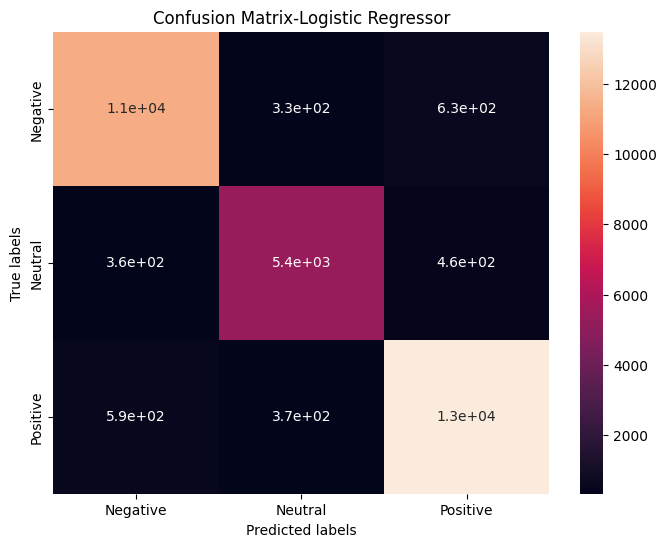

In [121]:
# Confusion Matrix
cm4 = confusion_matrix(y_train, y_pred_lr_train)
print(cm4)


ax= plt.subplot()
sns.heatmap(cm4, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix-Logistic Regressor')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [122]:
# Model Performance
lr_precision = precision_score(y_pred_lr_valid,y_valid, average ='weighted')
lr_recall = recall_score(y_pred_lr_valid,y_valid,average ='weighted')
lr_f1_score = f1_score(y_pred_lr_valid,y_valid,average ='weighted')
print(lr_precision, lr_recall, lr_f1_score)

0.7983116509403371 0.798712342079689 0.7984895760801328


# CatBoost

In [123]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.2 MB/s eta 0:00:00


In [124]:
# importing required library
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

clf2 = CatBoostClassifier() # class instantiation
# fitting the model on train dataset so that model can learn parameter.
clf2.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=False)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [125]:
# predicting train and test data
y_pred_cb_valid = clf2.predict(X_valid)
y_pred_cb_train = clf2.predict(X_train)

# checking accuracy
catboost_accuracy = accuracy_score(y_valid,y_pred_cb_valid)
# printing classification report
print("Train accuracy Score    : ",clf2.score(X_train,y_train))
print("Test accuracy Score : ",catboost_accuracy )
print(classification_report(y_pred_cb_valid,y_valid))

Train accuracy Score    :  0.8288838268792711
Test accuracy Score :  0.8074586977648203
              precision    recall  f1-score   support

          -1       0.79      0.84      0.81      2910
           0       0.78      0.69      0.73      1724
           1       0.84      0.84      0.84      3598

    accuracy                           0.81      8232
   macro avg       0.80      0.79      0.79      8232
weighted avg       0.81      0.81      0.81      8232



[[10024   917  1377]
 [  521  4912   737]
 [ 1188   894 12355]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

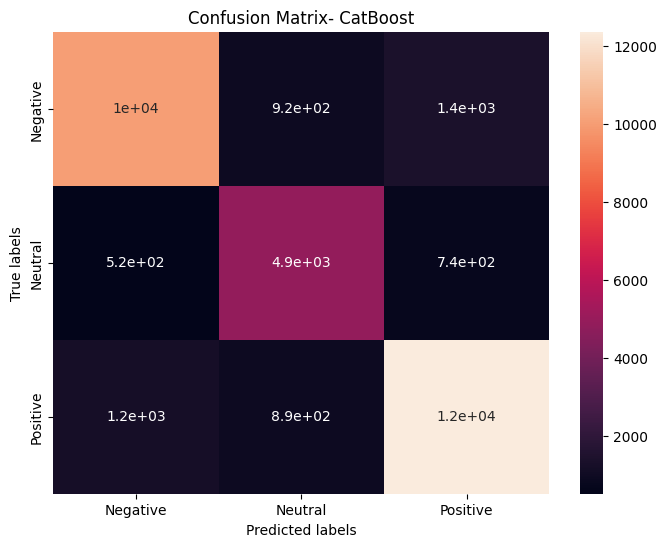

In [131]:
# Confusion Matrix
cm5 = confusion_matrix(y_train, y_pred_cb_train)
print(cm5)

ax= plt.subplot()
sns.heatmap(cm5, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- CatBoost')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [127]:
# Model Performance
cb_precision = precision_score(y_pred_cb_valid,y_valid, average ='weighted')
cb_recall = recall_score(y_pred_cb_valid, y_valid, average ='weighted')
cb_f1_score = f1_score(y_pred_cb_valid,y_valid,average ='weighted')
print(cb_precision, cb_recall, cb_f1_score)

0.8071065048358567 0.8074586977648203 0.8065774630030095


# Summary of All Models

In [128]:
# making the dataframe which consist of models and correspoding evaluation metrics.
model_test = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression','Random Forest', 'Naive Bayes','Stochastic Gradient Decent','CatBoost'],
    'Test accuracy': [svm_accuracy, lr_accuracy,rf_accuracy, NB_accuracy,sgd_accuracy,catboost_accuracy],
    'Recall': [svc_recall, lr_recall, rf_recall, NB_recall, sgd_recall, cb_recall],
    'Precision': [svc_precision, lr_precision, rf_precision, NB_precision, sgd_precision, cb_precision],
    'F1-Score': [svc_f1_score, lr_f1_score, rf_f1_score, NB_f1_score, sgd_f1_score, cb_f1_score]
    })
model_test.sort_values(by='Test accuracy', ascending=False)
model_test

Model  Test accuracy    Recall  Precision  F1-Score
0     Support Vector Machines       0.794582  0.794582   0.794457  0.794487
1         Logistic Regression       0.798712  0.798712   0.798312  0.798490
2               Random Forest       0.760690  0.760690   0.761855  0.760677
3                 Naive Bayes       0.683916  0.683916   0.745189  0.704341
4  Stochastic Gradient Decent       0.810374  0.810374   0.810312  0.810315
5                    CatBoost       0.807459  0.807459   0.807107  0.806577

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Support Vector Machines'),
  Text(1, 0, 'Logistic Regression'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Naive Bayes'),
  Text(4, 0, 'Stochastic Gradient Decent'),
  Text(5, 0, 'CatBoost')])

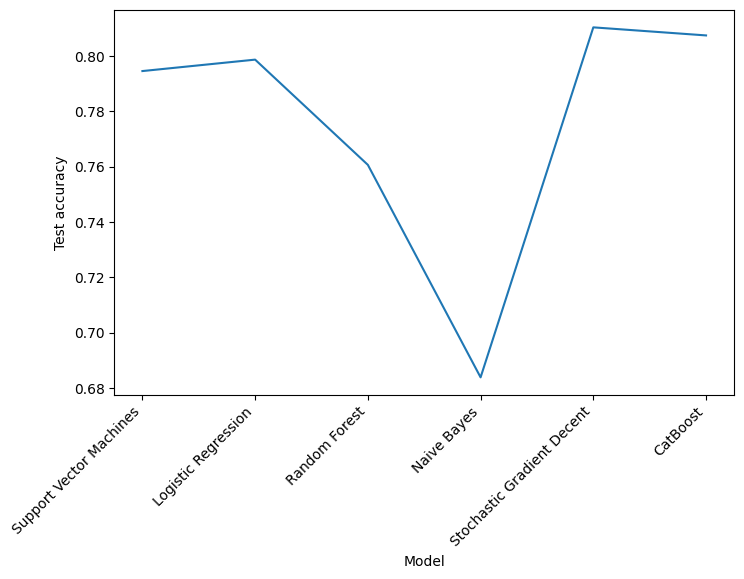

In [130]:

# Creating plot between Test accuracy and all 6 models used
plt.figure(figsize=(8,5))
sns.lineplot(data=model_test, x='Model', y='Test accuracy')
plt.xticks(rotation=45, ha='right')

# **Conclusion**

# On EDA:

1-Original dataset contains 6 columns and 41157 rows.

2-‘Location’ column contains approx. 20.87% of Null values.

3-The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.

4-In order to analyse the data we required only two columns "OriginalTweet" & "Sentiment". Hence, to avoid NaN values in "Location" columns we didnot used it further.

5-There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive. So, we merged Extremely Positive with positive and Extremely Negative with Negative. And use encoding with value ‘-1’ for negative, ‘0’ for neutral and ‘1’ for positive.

6-All tweets data collected between months of March and April 2020 and of around 30 days.

7-Most of the tweets came from London followed by U.S.

8-Among top 10 mentions in tweets realDolandTrump was the top mentioned name and "#coronavirus" was most trendiest hashtag that was trending during that period.


# On Model Training


1-At the end we conclude that in our project with 6 models namely Naive Bayes Classifier,Stochastic Gradient Descent, Random Forest Classifier,Support Vector Machine, Logistic Regression and CatBoost. We are getting the highest test accuracy of about 80.98% with Stochastic Gradient Descent.


2-And also after the use of gridsearchCV their is not much improvement came in the test model accuracy.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***